<a href="https://colab.research.google.com/github/vipin-jangra/machine_leaning/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import pandas as pd 
import numpy as np 

In [73]:
dataset = pd.read_csv('Housing.csv')

In [74]:
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [75]:
dataset.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [76]:
import matplotlib.pyplot as plt

In [77]:
def scatter(x):
  plt.scatter(dataset['price'],dataset[x])
  plt.title(x+' vs Price') #title of the graph
  plt.xlabel('Price') #x-axis
  plt.ylabel(x) #y-axis
  plt.show()

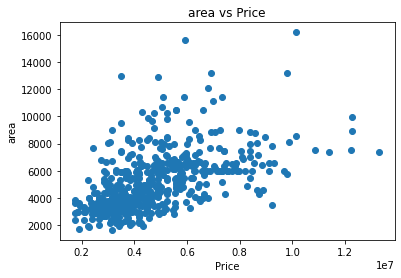

In [78]:
scatter('area')

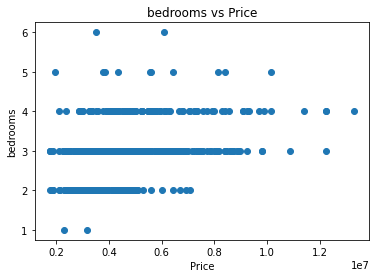

In [79]:
scatter('bedrooms')

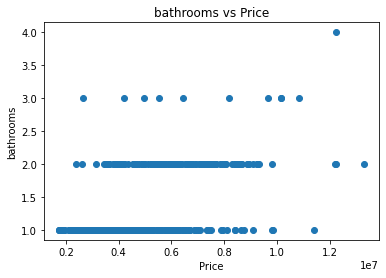

In [80]:
scatter('bathrooms')

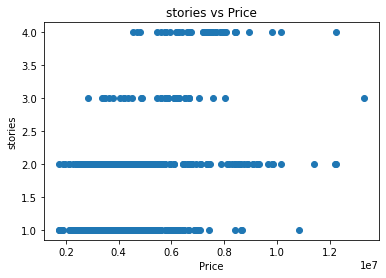

In [81]:
scatter('stories')

In [82]:
y = dataset['price']

In [83]:
x = dataset.drop(['price','mainroad','guestroom','basement','hotwaterheating',
                  'airconditioning','prefarea','furnishingstatus'],axis=1)

In [84]:
x.shape, y.shape

((545, 5), (545,))

In [85]:
x

,area,bedrooms,bathrooms,stories,parking
0,7420,4,2,3,2
1,8960,4,4,4,3
2,9960,3,2,2,2
3,7500,4,2,2,3
4,7420,4,1,2,2
...,...,...,...,...,...
540,3000,2,1,1,2
541,2400,3,1,1,0
542,3620,2,1,1,0
543,2910,3,1,1,0


In [86]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [87]:
dataset.corr()

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


In [88]:
model = LinearRegression()

In [89]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
X_train.shape , X_test.shape, y_test.shape, y_train.shape

((436, 5), (109, 5), (109,), (436,))

In [90]:
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.fit_transform(X_test)

In [91]:
x_train[:5], x_test[:5]

(array([[-0.71677205, -1.29437561, -0.57330726, -0.93314164, -0.81914879],
        [-0.53893631, -1.29437561, -0.57330726, -0.93314164, -0.81914879],
        [-0.98820554, -1.29437561, -0.57330726, -0.93314164, -0.81914879],
        [-0.72613182, -1.29437561, -0.57330726, -0.93314164, -0.81914879],
        [ 2.20347795,  0.05251643, -0.57330726, -0.93314164, -0.81914879]]),
 array([[-0.50073521,  0.02560738, -0.56354451,  0.27241586,  0.49214421],
        [ 1.95422869,  0.02560738, -0.56354451, -0.91531729,  1.73967255],
        [-0.73662142,  1.42120937, -0.56354451,  0.27241586, -0.75538413],
        [ 3.5180669 , -1.36999462, -0.56354451, -0.91531729,  0.49214421],
        [-0.64925616,  1.42120937, -0.56354451,  0.27241586, -0.75538413]]))

In [92]:
model.fit(x_train,y_train)

LinearRegression()

In [93]:
model.score(x_test,y_test)

0.603861513594665

In [94]:
model.score(x_train,y_train)

0.5538073529462888

In [119]:
predictions = model.predict(x_train)

In [117]:
model.intercept_

4777635.183486238

Text(0, 0.5, 'Predicted')

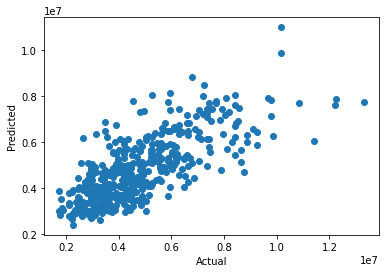

In [130]:
plt.scatter(y_train,predictions)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [124]:
from sklearn import metrics
metrics.mean_absolute_error(y_train, predictions)


941305.0514838805

In [125]:
metrics.mean_squared_error(y_train, predictions)


1626007222198.1946

In [126]:
np.sqrt(metrics.mean_squared_error(y_train, predictions))

1275149.8822484338

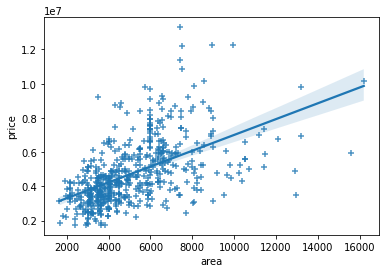

In [132]:
import seaborn as sns
sns.regplot(y="price", x='area', data=dataset, fit_reg = True,marker='+')